#  <span style="text-align=center; color:DarkMagenta; font-family:Georgia; font-size:1.2em;"> **_M2 - TP EIAH - MAY_** </span>

Eliot Lepoittevin & Benjamin Riviere

# <span style="color:brown; font-family:times; font-size:1.3em;">Code</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math

#given a panda dataframe & the column id of the usernames, retrieve the data sorted by user
def LoadPerUserData(dataframe,userNamePos):
    userData = {}
    data = dataframe.values
    
    for i in range(len(data)):
        username = data[i][userNamePos]
        
        if(userData.get(username) == None):
            userData[username] = []
        userData[username].append(data[i])

    return userData


In [2]:
'''
INDICATORS

#create an indicator (which is dictionarry of différents usefull values retrieve or calculated from the data)
#the data are all the informations we have about a same user
def indicatorName(data):
    return indicator
'''

def GetReactivityIndicator(userData):
    
    totalDelayTime = 0
    totalMessage = 1
    #print(userData)
#     for d in userData:
        
#         totalDelayTime+= float(d[6])
#         totalMessage+=1
    
    #input in the indicator dictionary the values and names to display for those values
    indicator = {}
    indicator['DelayForWritingMessages']=totalDelayTime/totalMessage
    indicator['test']=3
    
    return indicator

def GetMotivationIndicator(userData):
    
    nb_connexions = 0 
    active_actions = 0
    passive_actions = 0        
    delai_connexions = []
    
    for i in range(0, len(userData)):
            
        if userData[i][2] == "Connexion": nb_connexions+=1
        elif "Répondre" in userData[i][2] : active_actions+=1
        elif "Poster" in userData[i][2] : active_actions+=1
        else : passive_actions+=1
            
#         if not math.isnan(userData[i][6]): 
#             print(userData[i][6])
#             delai_connexions.append(datetime.datetime.strptime(userData[i][6], '%H:%M:%S'))
            
    #input in the indicator dictionary the values and names to display for those values
    indicator = {}
    indicator['averageResponseTime']=0
    
    return indicator

In [3]:
#generate the indocators dictionary for each user
#new indicators can be easily used by adding a new indicator key and call the indicator function created
def GenerateUsersIndicators(userData_tr):
    usersIndicators = {}

    for user in userData_tr:
        data = userData_tr[user]
        
        indicators = {}
        
        #indicator's) to generate
        indicators['Reactivity']=GetReactivityIndicator(data)
        indicators['Motivation']=GetMotivationIndicator(data)
        
        usersIndicators[user]=indicators
        
    return usersIndicators

In [4]:
#display specified indicator for specified user(indicators are all the indicators generated for all users)
def displayIndicator(usersIndicators,indicatorName,userName):
    indicator = usersIndicators[userName][indicatorName]
    
    #title
    plt.title(indicatorName + " for the user "+userName)
    #labels
    activities = indicator.keys()
    #values
    slices = indicator.values()
    
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
        return my_autopct
    
    # plotting the pie chart
    plt.pie(slices, labels = activities,
            startangle=90, shadow = True,
            radius = 1.2, autopct=make_autopct(slices))
    # plotting legend
    plt.legend()
    # showing the plot
    plt.show()

# <span style="color:brown; font-family:times; font-size:1.3em;">Résultats</span>

In [5]:
#to increase data limit : jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000

#load de data from the csv files
df_tr = pd.read_csv ('csv_dump/transition.csv')

#group the data per user
userData_tr = LoadPerUserData(df_tr,1)
# print(str(userData_tr["mmay"]))

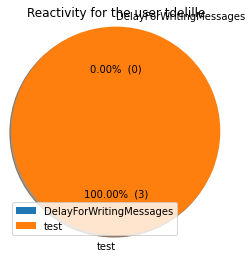

<ipython-input-4-71446e3b89b0>:20: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(slices, labels = activities,


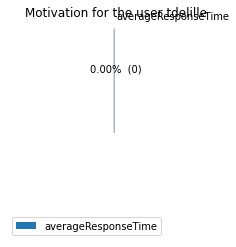

In [6]:
usersIndicators = GenerateUsersIndicators(userData_tr)
#print(usersIndicators)

displayIndicator(usersIndicators,'Reactivity','tdelille')
displayIndicator(usersIndicators,'Motivation','tdelille')

### <span style="color:green; font-family:Georgia; font-size:1.5em;">END</span>

In [7]:
#Eliot Lepoittevin
#Benjamin Riviere